# HW3.2: Neural Transition-Based Dependency Parsing


In this exercise, you are going to build a deep learning model for Neural Networks Transition-Based Dependency Parsing. A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between “head” words and words which modify those heads. Your implementation will be a transition-based parser, which incrementally builds up a parse one step at a time.

To complete this exercise, you will need to complete the code and build a deep learning model for dependency parsing. 

We provide the code for data preparation and the skeleton for PartialParse class. You do not need to understand the code outside of this notebook. 


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import shutil
# shutil.copy("/content/drive/MyDrive/FRA 501 IntroNLP&DL/Dataset/HW3-2.zip", "/content/HW3-2.zip")
# !unzip -q HW3-2.zip

## 1. Transition-Based Dependency Parsing

Your implementation will be a transition-based parser, which incrementally builds
up a parse one step at a time. At every step it maintains a partial parse, which is represented as follows:
- A stack of words that are currently being processed.
- A buffer of words yet to be processed.
- A list of dependencies predicted by the parser.

Initially, the stack only contains ROOT, the dependencies lists is empty, and the buffer contains all words
of the sentence in order. At each step, the parse applies a transition to the partial parse until its buffer is
empty and the stack is size 1. The following transitions can be applied:
- SHIFT: removes the first word from the buffer and pushes it onto the stack.
- LEFT-ARC: marks the second (second most recently added) item on the stack as a dependent of the
first item and removes the second item from the stack.
- RIGHT-ARC: marks the first (most recently added) item on the stack as a dependent of the second
item and removes the first item from the stack.

Your parser will decide among transitions at each state using a neural network classifier.

### TODO 1 (Written):
Go through the sequence of transitions needed for parsing the sentence “I parsed
this sentence correctly”. The dependency tree for the sentence is shown below. At each step, give the
configuration of the stack and buffer, as well as what transition was applied this step and what new
dependency was added (if any). The first three steps are provided below as an example.

Image --> https://drive.google.com/file/d/10jYgxDhsyolZGarcNTEdt6G2xB0l9iZU/view?usp=share_link 

Complete the following table (double click the table and fill in the rest):

| stack    |  buffer |  new dependency | transition |
| :------: |:------: | :-------------: | :--------: |
| \[ROOT\]            | \[I, parsed, this, sentence, correctly\] |          | Initial Configuration |
| \[ROOT, I\]         | \[parsed, this, sentence, correctly\]    |          | SHIFT |
| \[ROOT, I, parsed\] | \[this, sentence, correctly\]            |          | SHIFT |
| \[ROOT, parsed\]    | \[this, sentence, correctly\]            | parsed→I | LEFT-ARC |
| \[ROOT, parsed,this\]| \[sentence, correctly\] | | SHIFT |
| \[ROOT, parsed,this, sentence\]|\[correctly\]  | | SHIFT |
| \[ROOT, parsed,sentence\]|\[correctly\]  | sentence→this | LEFT-ARC |
| \[ROOT, parsed\]|\[correctly\]  | parsed→sentence | Right-ARC |
| \[ROOT, parsed, correctly\]| | | SHIFT|
| \[ROOT, parsed\]| | parsed→correctly | Right-ARC|
| \[ROOT\]| | ROOT→parsed | Right-ARC|

- เติมคำด้านบน
- สร้างการเชื่อมโยง
- slide 54

### TODO 2 (Coding):
Implement the __\_\_init\_\___ and __parse_step__ functions in the PartialParse class. Your code must past both of the following tests.

- ทำ stack 
- ทำ buffer

In [3]:
class PartialParse(object):
    def __init__(self, sentence):
        """Initializes this partial parse.

        Your code should initialize the following fields:
            self.stack: The current stack represented as a list with the top of the stack as the
                        last element of the list.
            self.buffer: The current buffer represented as a list with the first item on the
                         buffer as the first item of the list
            self.dependencies: The list of dependencies produced so far. Represented as a list of
                    tuples where each tuple is of the form (head, dependent).
                    Order for this list doesn't matter.

        The root token should be represented with the string "ROOT"

        Args:
            sentence: The sentence to be parsed as a list of words.
                      Your code should not modify the sentence.
        """
        # The sentence being parsed is kept for bookkeeping purposes. Do not use it in your code.
        self.sentence = sentence #--list

        ### YOUR CODE HERE
        #self.stack = ?  --> list
        #self.buffer = ? --> list
        #self.dependencies = ?  --> list
        #3 ตัวทำนี้ตอนแรกเป็นอย่างไร
        self.stack = ["ROOT"]
        self.buffer = self.sentence.copy()
        self.dependencies = list()
        ### END YOUR CODE

    def parse_step(self, transition):
        """Performs a single parse step by applying the given transition to this partial parse

        Args:
            transition: A string that equals "S", "LA", or "RA" representing the shift, left-arc,
                        and right-arc transitions. You can assume the provided transition is a legal
                        transition.
        """
        ### YOUR CODE HERE
        # update 3 self
        if transition == "S":
            self.stack.append(self.buffer[0])
            self.buffer.pop(0)
        if transition == "LA":
            self.dependencies.append((self.stack[len(self.stack)-1],self.stack[len(self.stack)-2]))
            self.stack.pop(len(self.stack)-2)
        if transition == "RA":
            self.dependencies.append((self.stack[len(self.stack)-2],self.stack[len(self.stack)-1]))
            self.stack.pop(len(self.stack)-1)
        ### END YOUR CODE

    def parse(self, transitions):
        # slide 54
        """Applies the provided transitions to this PartialParse

        Args:
            transitions: The list of transitions in the order they should be applied
        Returns:
            dependencies: The list of dependencies produced when parsing the sentence. Represented
                          as a list of tuples where each tuple is of the form (head, dependent)
        """
        for transition in transitions:
            self.parse_step(transition)
        return self.dependencies

In [4]:
# Do not modify this code
def test_step(name, transition, stack, buf, deps,
              ex_stack, ex_buf, ex_deps):
    """Tests that a single parse step returns the expected output"""
    pp = PartialParse([])
    pp.stack, pp.buffer, pp.dependencies = stack, buf, deps

    pp.parse_step(transition)
    stack, buf, deps = (tuple(pp.stack), tuple(pp.buffer), tuple(sorted(pp.dependencies)))
    assert stack == ex_stack, \
        "{:} test resulted in stack {:}, expected {:}".format(name, stack, ex_stack)
    assert buf == ex_buf, \
        "{:} test resulted in buffer {:}, expected {:}".format(name, buf, ex_buf)
    assert deps == ex_deps, \
        "{:} test resulted in dependency list {:}, expected {:}".format(name, deps, ex_deps)
    print("{:} test passed!".format(name))


def test_parse_step():
    """Simple tests for the PartialParse.parse_step function
    Warning: these are not exhaustive for test
    """
    test_step("SHIFT", "S", ["ROOT", "the"], ["cat", "sat"], [],
              ("ROOT", "the", "cat"), ("sat",), ())
    test_step("LEFT-ARC", "LA", ["ROOT", "the", "cat"], ["sat"], [],
              ("ROOT", "cat",), ("sat",), (("cat", "the"),))
    test_step("RIGHT-ARC", "RA", ["ROOT", "run", "fast"], [], [],
              ("ROOT", "run",), (), (("run", "fast"),))


def test_parse():
    """Simple tests for the PartialParse.parse function
    Warning: these are not exhaustive
    """
    sentence = ["parse", "this", "sentence"]
    dependencies = PartialParse(sentence).parse(["S", "S", "S", "LA", "RA", "RA"])
    dependencies = tuple(sorted(dependencies))
    expected = (('ROOT', 'parse'), ('parse', 'sentence'), ('sentence', 'this'))
    assert dependencies == expected,  \
        "parse test resulted in dependencies {:}, expected {:}".format(dependencies, expected)
    assert tuple(sentence) == ("parse", "this", "sentence"), \
        "parse test failed: the input sentence should not be modified"
    print("parse test passed!")

for test

In [5]:
test_parse_step()
test_parse()

SHIFT test passed!
LEFT-ARC test passed!
RIGHT-ARC test passed!
parse test passed!


## 2. Setup and Preprocessing

In [6]:
# %pip install utils

In [7]:
from utils.parser_utils import minibatches, load_and_preprocess_data

Preparing data. We will use a subset of Penn Treebank and pretrained embeddings in this task

We are now going to train a neural network to predict, given the state of the stack, buffer, and dependencies, which transition should be applied next. First, the model extracts a feature vector representing the current state. We will be using the feature set presented in the original neural dependency parsing paper: A Fast and Accurate Dependency Parser using Neural Networks. 

The function extracting these features has been implemented for you in parser_utils. This feature vector consists of a list of tokens (e.g., the last word in the stack, first word in the buffer, dependent of the second-to-last word in the stack if there is one, etc.). They can be represented as a list of integers.

download data

In [8]:
parser, embeddings, train_examples, dev_set, test_set = load_and_preprocess_data(True)

Loading data...
took 4.77 seconds
Building parser...
took 0.05 seconds
Loading pretrained embeddings...
took 6.44 seconds
Vectorizing data...
took 0.12 seconds
Preprocessing training data...
took 2.66 seconds


In [9]:
print(len(train_examples), len(dev_set), len(test_set))

48390 500 500


In [10]:
train_examples[10]

([5156,
  660,
  88,
  96,
  85,
  2131,
  5155,
  5155,
  5155,
  5155,
  5155,
  5155,
  91,
  5155,
  113,
  5155,
  5155,
  5155,
  84,
  39,
  40,
  61,
  41,
  39,
  83,
  83,
  83,
  83,
  83,
  83,
  40,
  83,
  41,
  83,
  83,
  83],
 [1, 1, 1],
 2)

In [11]:
embeddings

array([[ 1.0813558 , -0.54858285,  1.0379329 , ..., -1.0971751 ,
         0.83429   , -0.33654112],
       [-0.6303152 , -1.2442269 ,  0.3082633 , ...,  0.2160937 ,
         1.6340177 , -0.6553511 ],
       [ 0.5459255 ,  1.6614166 , -0.40182152, ...,  0.8955122 ,
        -1.4091835 ,  0.39643613],
       ...,
       [ 0.14805727, -1.4057364 , -0.41852438, ..., -0.30620167,
         0.0781661 , -1.4147701 ],
       [-0.02487083, -0.03787473,  0.4622966 , ...,  2.0756578 ,
        -1.3287282 ,  0.42858732],
       [ 1.876752  ,  1.8551117 ,  0.54417676, ..., -0.30099747,
        -2.7693915 ,  1.461999  ]], dtype=float32)

In [12]:
print(embeddings.shape)

(5157, 50)


Get the full batch of our subset data

In [13]:
minibatch_gen = minibatches(train_examples, len(train_examples))
x_train, y_train = minibatch_gen.__next__()

In [14]:
print(x_train.shape)
print(y_train.shape)

(48390, 36)
(48390, 3)


In [15]:
x_train[0]

array([  99,  314,  111, 1249, 3333,  935, 5155, 5155, 5155, 5155, 5155,
       5155, 1782,   86,  117, 1784,  639, 5155,   48,   39,   40,   53,
         43,   39,   83,   83,   83,   83,   83,   83,   42,   45,   58,
         42,   42,   83])

You can use parser.id2tok[word_id] to lookup the word in English.

In [16]:

for word_id in x_train[0]:
  print(parser.id2tok[word_id])

said
concern
with
projected
first-year
revenue
<NULL>
<NULL>
<NULL>
<NULL>
<NULL>
<NULL>
elanco
,
will
america
dow
<NULL>
<p>:VBD
<p>:NN
<p>:IN
<p>:VBN
<p>:JJ
<p>:NN
<p>:<NULL>
<p>:<NULL>
<p>:<NULL>
<p>:<NULL>
<p>:<NULL>
<p>:<NULL>
<p>:NNP
<p>:,
<p>:MD
<p>:NNP
<p>:NNP
<p>:<NULL>


In [17]:
y_train[0]

array([0., 0., 1.])

## 3. Model

In [18]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Reshape, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

### TODO 3 (Coding):
Build and train a tensroflow keras model to predict an action for each state of of the input. This is a simple classification task. 
- The input and output of the model must match the dimention of x_train and y_train.
- The model must use the provided pretrained embeddings
- The model could comprise of only a feedforward layer and a dropout
- Training loss should be around 0.1 or below, and training categorical_accuracy above 0.94

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking, Conv1D, Bidirectional
from tensorflow.keras.optimizers import Adam

pre train

In [20]:
print(embeddings.shape)
embeddings[5156]

(5157, 50)


array([ 1.8767520e+00,  1.8551117e+00,  5.4417676e-01, -1.2198263e+00,
        5.3194322e-02,  1.8815017e-01,  1.5810199e-02, -2.5974551e-01,
       -5.3169656e-01,  4.7303460e-05,  8.4827018e-01,  5.6904757e-01,
       -8.8461471e-01, -1.7579705e-01, -9.5777318e-02,  3.0328125e-01,
        6.8692520e-02,  5.4766995e-01,  6.1790103e-01, -1.4867014e+00,
       -1.0453205e+00, -9.3277499e-02,  6.6315538e-01, -4.5110144e-02,
        1.9384656e+00,  3.9860618e-01,  1.2429166e+00,  8.4451032e-01,
        2.5783753e-01, -1.9865062e+00,  8.0034626e-01,  1.3310063e+00,
        1.0518700e+00,  9.6602809e-01,  3.9985323e-01, -2.0745108e-01,
       -1.4667225e-01,  1.4348943e+00, -2.4156748e-01, -5.2080256e-01,
        2.8683871e-02,  3.3961695e-01, -5.0785638e-02,  2.0637585e-01,
        3.7737238e-01,  2.8489068e-01, -2.3836337e-01, -3.0099747e-01,
       -2.7693915e+00,  1.4619991e+00], dtype=float32)

In [21]:
print(len(parser.id2tok))
print(parser.id2tok.items())



5157
dict_items([(0, '<l>:root'), (1, '<l>:cc:preconj'), (2, '<l>:cop'), (3, '<l>:nmod:tmod'), (4, '<l>:dep'), (5, '<l>:auxpass'), (6, '<l>:cc'), (7, '<l>:mark'), (8, '<l>:nmod:poss'), (9, '<l>:advcl'), (10, '<l>:case'), (11, '<l>:advmod'), (12, '<l>:compound'), (13, '<l>:det:predet'), (14, '<l>:nmod:npmod'), (15, '<l>:det'), (16, '<l>:parataxis'), (17, '<l>:nummod'), (18, '<l>:acl'), (19, '<l>:iobj'), (20, '<l>:nmod'), (21, '<l>:compound:prt'), (22, '<l>:ccomp'), (23, '<l>:aux'), (24, '<l>:conj'), (25, '<l>:expl'), (26, '<l>:acl:relcl'), (27, '<l>:discourse'), (28, '<l>:neg'), (29, '<l>:xcomp'), (30, '<l>:dobj'), (31, '<l>:amod'), (32, '<l>:nsubj'), (33, '<l>:punct'), (34, '<l>:nsubjpass'), (35, '<l>:mwe'), (36, '<l>:appos'), (37, '<l>:csubj'), (38, '<l>:<NULL>'), (39, '<p>:NN'), (40, '<p>:IN'), (41, '<p>:DT'), (42, '<p>:NNP'), (43, '<p>:JJ'), (44, '<p>:NNS'), (45, '<p>:,'), (46, '<p>:.'), (47, '<p>:RB'), (48, '<p>:VBD'), (49, '<p>:CD'), (50, '<p>:VB'), (51, '<p>:CC'), (52, '<p>:TO'),

In [22]:
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking, Conv1D, Bidirectional
import numpy as np
word_to_idx,Embedding = embeddings.shape
print(word_to_idx,Embedding)

word_to_idx = word_to_idx
num_tokens = word_to_idx + 2
embedding_dim = Embedding
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
print(embedding_matrix.shape)
for i, work in parser.id2tok.items():
    # embedding_vector = embeddings.get(word)
    embedding_vector = embeddings[i]
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

5157 50
(5159, 50)
Converted 5157 words (0 misses)


In [23]:
print(type(embedding_matrix))
print(len(embedding_matrix))
print(embedding_matrix[5158])
print(len(embedding_matrix[1]))
print(word_to_idx)


<class 'numpy.ndarray'>
5159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
50
5157


In [24]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking, Conv1D, Bidirectional,Conv2D

model1 = Sequential() 
model1.add(Embedding(word_to_idx+2, 50, embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
model1.add(GRU(50))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50, activation='tanh'))
model1.add(Dense(3, activation='softmax'))
opt=Adam(lr=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          257950    
_________________________________________________________________
gru (GRU)                    (None, 50)                15300     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 278,503
Trainable params: 20,553
Non-trainable params: 257,950
_____________________________________________

C:\Users\kla\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
# Write your code here
print('Train...')
history1 = model1.fit(x_train, y_train,
          epochs=50,batch_size=5000,
        #   validation_data=[val_input, val_target]
        )

Train...
Epoch 1/50
10/10 [==============================] - 23s 1s/step - loss: 1.0164 - accuracy: 0.4808
Epoch 2/50
10/10 [==============================] - 14s 1s/step - loss: 0.9037 - accuracy: 0.5109
Epoch 3/50
10/10 [==============================] - 14s 1s/step - loss: 0.8629 - accuracy: 0.5306
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 0.8302 - accuracy: 0.5710
Epoch 5/50
10/10 [==============================] - 14s 1s/step - loss: 0.7951 - accuracy: 0.6045
Epoch 6/50
10/10 [==============================] - 14s 1s/step - loss: 0.7580 - accuracy: 0.6307
Epoch 7/50
10/10 [==============================] - 14s 1s/step - loss: 0.6886 - accuracy: 0.6816
Epoch 8/50
10/10 [==============================] - 14s 1s/step - loss: 0.6143 - accuracy: 0.7292
Epoch 9/50
10/10 [==============================] - 14s 1s/step - loss: 0.5503 - accuracy: 0.7717
Epoch 10/50
10/10 [==============================] - 14s 1s/step - loss: 0.4622 - accuracy: 0.8203
Epoch 11/5

In [29]:
import matplotlib.pyplot as plt

# summarize history for accuracy
def plot_history(history2):
    plt.plot(history2.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history2.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

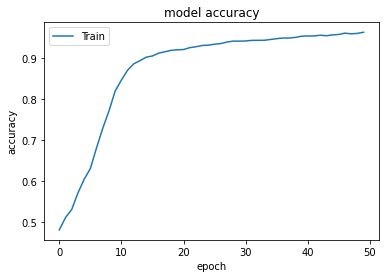

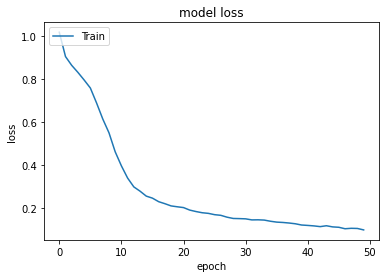

In [30]:
plot_history(history1)

# Conclusion

In [31]:
print(x_train.shape)
print(y_train.shape)

(48390, 36)
(48390, 3)


จากรูป จะสังเกตุเห็นได้ว่าในช่วง 20 epoch ค่า loss และ accuracy จะลดลงและเพิ่มขึ้นสูงมาก และจะเริ่มลู่เข้าหลัง epoch ที่ 20 

สิ่งที่ได้จะการทำ<br>
ผมได้ลองใช้ batch size ที่ 32 พบว่าค่า loss และ accuracy ขึ้นช้ามาก ถึงจะให้ epoch เยอะแต่ค่าที่ได้จะลู่เข้าค่าเดิมตั้ง epoch ที่ 5 ผมได้ลองใช้ batch size ที่ 5000 ทำให้จำนวนรอบในการคำนวณแต่ละ epoch ลดลงเหลือ 10 แต่ค่า loss และ accuracy ขึ้นลงเร็วขึ้น เนื่องจากข้อมูลมีประมาณ 50000 ตัวการที่ผมใช้ค่า batch size ต่างกันมีผลเป็นอย่างมาก 